In [1]:
!pip install seaborn --quiet

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [3]:
from google.colab import files
uploaded = files.upload()

Saving StarClassificationDataset.csv to StarClassificationDataset (1).csv


In [4]:
file_path = next(iter(uploaded))
df = pd.read_csv(file_path)
df.head()


<ipython-input-4-bcf868c728e6>:2: DtypeWarning: Columns (1,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,object_ID,alpha,delta,UV_filter,green_filter,red_filter,near_IR_filter,IR_filter,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,red_shift,plate_ID,MJD,fiber_ID,class
0,1.240000e+18,135.6891066,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.540000e+18,0.634794,5812,56354,171,GALAXY
1,1.240000e+18,144.8261006,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.180000e+19,0.779136,10445,58158,427,GALAXY
2,1.240000e+18,142.1887896,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.150000e+18,0.644195,4576,55592,299,GALAXY
3,1.240000e+18,338.7410378,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030000e+19,0.932346,9149,58039,775,GALAXY
4,1.240000e+18,345.2825932,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,NaN,301,3,137,6.890000e+18,0.116123,6121,56187,842,GALAXY


In [5]:
df = df.dropna(subset=['class'])

X = df[['UV_filter', 'green_filter', 'red_filter', 'near_IR_filter', 'IR_filter']]
y = df['class']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, stratify=y_encoded, random_state=42)


In [6]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [7]:
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.91      0.94      0.92     17834
         QSO       0.80      0.79      0.80      5688
        STAR       0.82      0.74      0.78      6478

    accuracy                           0.87     30000
   macro avg       0.84      0.83      0.83     30000
weighted avg       0.87      0.87      0.87     30000



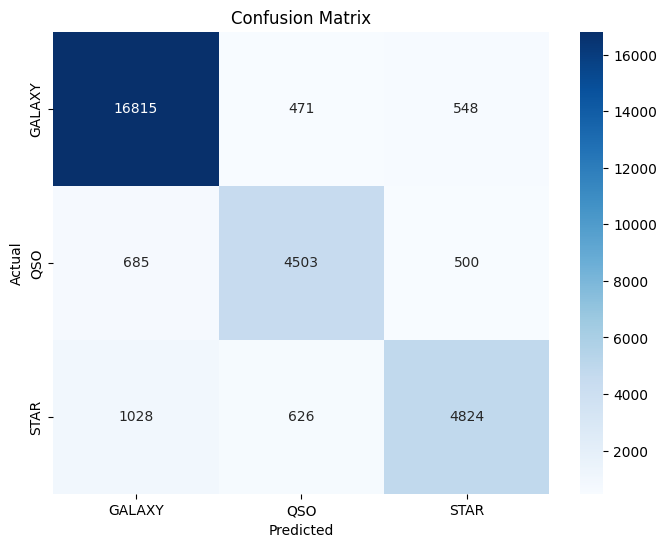

In [8]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**PART 2**

In [9]:
!pip install pandas numpy seaborn scikit-learn --quiet

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [10]:
from google.colab import files

uploaded = files.upload()


Saving housing.csv to housing.csv


In [11]:
file_path = next(iter(uploaded))
df = pd.read_csv(file_path)
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [13]:
df = df.dropna()
df['ocean_proximity'] = LabelEncoder().fit_transform(df['ocean_proximity'])

X = df.drop(columns=['median_house_value'])
y = df['median_house_value']


In [14]:
num_bins = int(1 + 3.322 * np.log10(len(y)))

y_binned = pd.qcut(y, q=num_bins, labels=False, duplicates='drop')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y_binned, random_state=42)


In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [16]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
ridge_preds = ridge_model.predict(X_test_scaled)

lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train_scaled, y_train)
lasso_preds = lasso_model.predict(X_test_scaled)


In [17]:
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)

    print(f"Performance of {model_name}:")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print("-" * 30)
evaluate_model(y_test, ridge_preds, "Ridge Regression")
evaluate_model(y_test, lasso_preds, "Lasso Regression")


Performance of Ridge Regression:
MAE: 51062.2197
MSE: 4829458799.7867
RMSE: 69494.3077
------------------------------
Performance of Lasso Regression:
MAE: 51063.0709
MSE: 4829575427.5775
RMSE: 69495.1468
------------------------------


   Model           MAE           MSE          RMSE
0  Ridge  51062.219727  4.829459e+09  69494.307679
1  Lasso  51063.070938  4.829575e+09  69495.146792


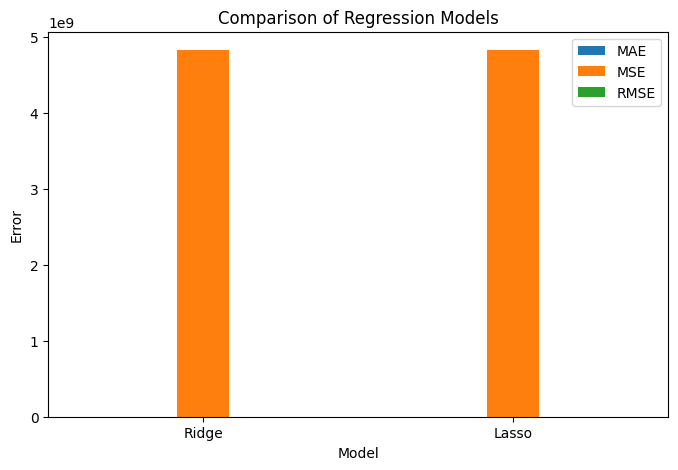

In [18]:
metrics = {
    "Model": ["Ridge", "Lasso"],
    "MAE": [mean_absolute_error(y_test, ridge_preds), mean_absolute_error(y_test, lasso_preds)],
    "MSE": [mean_squared_error(y_test, ridge_preds), mean_squared_error(y_test, lasso_preds)],
    "RMSE": [np.sqrt(mean_squared_error(y_test, ridge_preds)), np.sqrt(mean_squared_error(y_test, lasso_preds))]
}

metrics_df = pd.DataFrame(metrics)
print(metrics_df)
metrics_df.set_index("Model").plot(kind="bar", figsize=(8, 5))
plt.title("Comparison of Regression Models")
plt.ylabel("Error")
plt.xticks(rotation=0)
plt.show()
